Resolved model_id: coco/36, dataset_id: coco, version_id: 36


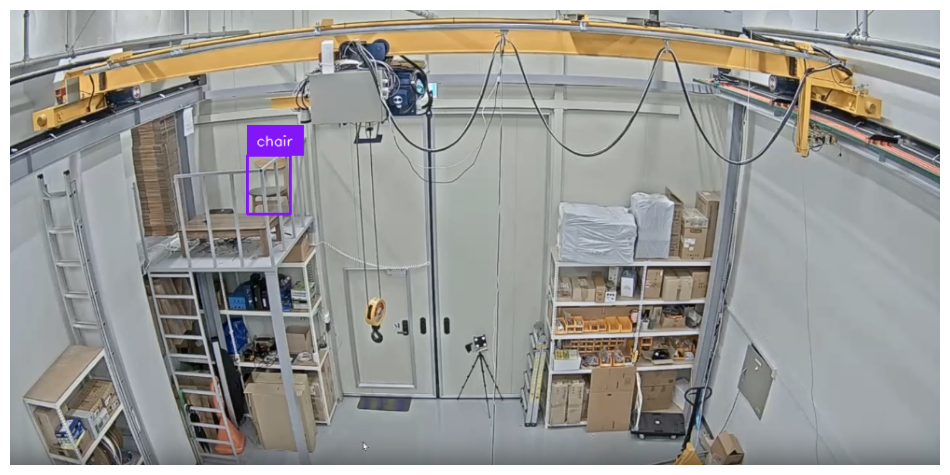

In [3]:
import os  # noqa
import supervision as sv  # noqa
from inference import get_model  # noqa
from PIL import Image  # noqa
from io import BytesIO  # noqa
import requests  # noqa

image = Image.open("test_8.jpeg")

model = get_model("rfdetr-base")

predictions = model.infer(image, confidence=0.5)[0]

detections = sv.Detections.from_inference(predictions)

labels = [prediction.class_name for prediction in predictions.predictions]

annotated_image = image.copy()
annotated_image = sv.BoxAnnotator(color=sv.ColorPalette.ROBOFLOW).annotate(
    annotated_image, detections
)
annotated_image = sv.LabelAnnotator(color=sv.ColorPalette.ROBOFLOW).annotate(
    annotated_image, detections, labels
)

sv.plot_image(annotated_image)
